In [1]:
import torch
# from vit_pytorch import ViT
import torch.nn as nn
import matplotlib.pyplot as plt
from model import MyViT
from torch.utils.data import DataLoader, random_split, Dataset

In [2]:
# Set the seed for PyTorch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [3]:
torch.cuda.is_available()

True

In [4]:
import torch
# from vit_pytorch import ViT

# vit_model = MyViT(
#     image_size = 32,
#     patch_size = 8,
#     num_classes = 1000,
#     dim = 1500,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 1500 * 3,
#     dropout = 0,
#     # dropout = 0.1,
#     emb_dropout = 0,
#     # emb_dropout = 0.1,
#     channels = 3
# )

# cifar_8_noise_no_final_layer_3
vit_model = MyViT(
    image_size = 32,
    patch_size = 8,
    num_classes = 1000,
    dim = 1028,
    depth = 6,
    heads = 16,
    mlp_dim = 1028 * 3,
    dropout = 0,
    # dropout = 0.1,
    emb_dropout = 0,
    # emb_dropout = 0.1,
    channels = 3
)

img = torch.randn(1, 1, 28, 28)

# BIG
# preds = v(img) # (1, 1000)
# import torch
# # from vit_pytorch import ViT

# vit_model = MyViT(
#     image_size = 28,
#     patch_size = 7,
#     num_classes = 1000,
#     dim = 2056,
#     depth = 4,
#     heads = 6,
#     mlp_dim = 2056 * 3,
#     dropout = 0,
#     # dropout = 0.1,
#     emb_dropout = 0,
#     # emb_dropout = 0.1,
#     channels = 1
# )

# img = torch.randn(1, 1, 28, 28)

# # preds = v(img) # (1, 1000)

192


In [5]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

total_params = count_parameters(vit_model)
print(f'Total number of parameters: {total_params}')


Total number of parameters: 64812864


In [6]:
import torch
from torchvision import datasets, transforms
import torchvision
# # Download and load the test data
# testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(
    root='./CIFAR_data',
    train=True,
    # download=True,
    transform=transform
)


In [7]:
import torch.utils
import torch.utils.data


train_size = 128
train_dataset, test_dataset = random_split(trainset, [train_size, len(trainset) - train_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

In [8]:
sample_images = next(iter(train_loader))[0]
test_samples  = next(iter(test_loader))[0]

In [9]:
def print_images(images):
    """
    Prints a batch of images with shape (64, 1, 28, 28) or (64, 3, 28, 28).

    Parameters:
    images (torch.Tensor): A tensor of shape (64, C, H, W) where C can be 1 (grayscale) or 3 (RGB).
    """
    # Ensure the input is a 4D tensor
    if images.ndim == 5:
        images = torch.squeeze(images, dim=1)
    assert images.ndim == 4, "Input tensor must be 4-dimensional"
    # Ensure the number of channels is either 1 or 3
    assert images.shape[1] in [1, 3], "Input tensor must have 1 or 3 channels"
    
    # Get the number of images in the batch
    batch_size = images.shape[0]
    
    # Define the number of rows and columns for the plot grid
    n_cols = 8
    n_rows = (batch_size + n_cols - 1) // n_cols
    
    # Create a figure to hold the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 1.5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    for i in range(batch_size):
        # Get the image and convert it to a numpy array
        img = images[i].permute(1, 2, 0).numpy()

        # Normalize the image to [0, 1] range
        img = (img - img.min()) / (img.max() - img.min())
        
        # If the image has 1 channel, remove the last dimension
        if img.shape[-1] == 1:
            img = img.squeeze(-1)
        
        # Plot the image
        axes[i].imshow(img, cmap='gray' if images.shape[1] == 1 else None)
        axes[i].axis('off')
    
    # Remove any remaining empty subplots
    for i in range(batch_size, len(axes)):
        axes[i].axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [10]:
# print_images(sample_images)
# with torch.no_grad():
#     print_images(output)

In [11]:
# checkpoint_path = './cifar_8_noise_no_final_layer_4/epoch_12500_model_0.00000153.pth'
checkpoint_path = './cifar_8_noise_no_final_layer_4/epoch_102500_model_0.00000156.pth'
import os
if not os.path.isfile(checkpoint_path):
    raise FileNotFoundError(f"Checkpoint file '{checkpoint_path}' not found")

In [12]:
vit_model.load_state_dict(torch.load(checkpoint_path))
# # # # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # # device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model.to(device)

# Parameters for Gaussian noise
mean = 0
std_dev = 0.5  # Standard deviation (adjust as needed)
# std_dev = 0.3  # Standard deviation (adjust as needed)
# std_dev = 1  # Standard deviation (adjust as needed)
# std_dev = 3  # Standard deviation (adjust as needed)

/tmp/ipykernel_2268122/4288936860.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit_model.load_state_dict(torch.load(checkpoint_path))


In [246]:
import torch.optim as optim
import torch
from tqdm import tqdm
import time

# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

# Define loss function and optimizer
criterion = nn.MSELoss()
# optimizer = optim.Adam(vit_model.parameters(), lr=0.001)
# milestones = [3000, 6000, 8000, 1000, 12000, 14000, 17000]

# optimizer = optim.Adam(vit_model.parameters(), lr=0.0000000011)
# optimizer = optim.RMSprop(vit_model.parameters(), lr=0.0000000011)
# optimizer = optim.RMSprop(vit_model.parameters(), lr=0.0001)
# optimizer = optim.Adam(vit_model.parameters(), lr=0.0001)
# optimizer = optim.Adam(vit_model.parameters(), lr=0.0015)
# optimizer = optim.Adam(vit_model.parameters(), lr=0.0015)
optimizer = optim.Adam(vit_model.parameters(), lr=0.00000015)
# optimizer = optim.Adam(vit_model.parameters(), lr=0.015)

# Define the learning rate scheduler
milestones = [150000]
milestones = [500, 1000, 2000, 3000, 5000, 15000, 20000, 25000, 30000 , 40000 , 50000, 80000]
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.6)

# Move the model to the GPU
vit_model.to(device)

num_epochs = 1_600_000

# Parameters for Gaussian noise
mean = 0
std_dev = 0.5  # Standard deviation (adjust as needed)
# std_dev = 0.3  # Standard deviation (adjust as needed)
# std_dev = 1  # Standard deviation (adjust as needed)
# std_dev = 3  # Standard deviation (adjust as needed)



# Training loop
def train_model(model, optimizer, scheduler, dataloader, target_loss=1e-8):
    model.train()
    with tqdm(total=num_epochs, desc="Processing") as pbar:
        noise_counter = 0
        for epoch in range(num_epochs):
            running_loss = 0.0
            for images, _ in dataloader:
                # Move the images to the GPU
                images = images.to(device)
                optimizer.zero_grad()
                # Add Gaussian noise
                # noises = torch.normal(mean, std_dev + (torch.rand(1)[0] / 1000), size=images.shape[-2:]).to(device)
                # noises = torch.normal(mean, std_dev + (torch.rand(1)[0] / 200000), size=images.shape[-2:]).to(device)
                noises = torch.normal(mean, std_dev, size=images.shape[-2:]).to(device)
                # noises = torch.normal(mean, std_dev * (torch.rand(1)[0] / 200), size=images.shape[-2:]).to(device)
                # if noise_counter < 2:
                #     noises = torch.normal(mean, std_dev * 1.1, size=images.shape[-2:]).to(device)
                # if 450 < noise_counter < 452:
                #     noises = torch.normal(mean, std_dev * 1.2, size=images.shape[-2:]).to(device)
                # if 760 < noise_counter < 762:
                #     noises = torch.normal(mean, std_dev * 1.3, size=images.shape[-2:]).to(device)
                # noise_counter += 1
                # if noise_counter > 1000:
                #     noise_counter = 0

                noisy_images = images + noises
                # noisy_images = images 
                outputs = model(noisy_images)
                # outputs2 = model(outputs)                       # New
                loss = criterion(outputs, images)
                # loss = loss + criterion(outputs2, images) * 0.1  # New
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            avg_loss = running_loss / len(dataloader)
            pbar.set_postfix({'Loss:': f'{avg_loss}'})
            pbar.update(1)

            # Step the scheduler
            scheduler.step()
            # if epoch % 400 == 0 and epoch != 0:
            #     time.sleep(90)

            if epoch % 2500 == 0 and epoch != 0:
                torch.save(model.state_dict(), f'./cifar_8_noise_no_final_layer_4/epoch_{epoch}_model_{avg_loss:.8f}.pth')

            # Save intermediate models
            if avg_loss <= target_loss:
                torch.save(model.state_dict(), f'./cifar_8_noise_no_final_layer_4/model_{avg_loss:.8f}.pth')
                break

# Train the model
train_model(vit_model, optimizer, scheduler, train_loader)


Processing:   0%|          | 677/1600000 [00:34<22:32:05, 19.71it/s, Loss:=1.965529918379616e-06] 


KeyboardInterrupt: 

In [13]:
def lines_herizontal_noise(img, number_of_lines=5, line_width=2, noise_value=None, return_noise=False):
    h, w = img.shape[-2:]
    white_space_size = 1
    square_size = number_of_lines * (2 + white_space_size) # 1 is the space between lines
    start_pos   = (h - square_size) // 2
    end_pos = start_pos + square_size

    noise = noise_value if noise_value else 2 * (torch.rand((line_width, square_size)) - 1)

    img_noisy = img.clone()
    noise_out = torch.ones((h, w)) * -1
    for i in range(number_of_lines):
        img_noisy[:,:,start_pos + (i * (line_width + white_space_size)): start_pos + (i * (line_width + white_space_size)) + line_width, start_pos: end_pos] = noise
        noise_out[start_pos + (i * (line_width + white_space_size)): start_pos + (i * (line_width + white_space_size)) + line_width, start_pos: end_pos] = noise

    if return_noise:
        return img_noisy, noise_out
    return img_noisy

In [14]:
def right_side_noise(img, noise_value=None, return_noise=False):
    h, w = img.shape[-2:]
    # noise = 2 * (torch.rand((h, w // 2)) - 1)
    noise = 2 * (torch.rand((h, w // 4)) - 1)


    img_noisy = img.clone()
    # img_noisy[:,:,:, w // 2:] = noise_value if noise_value else noise
    img_noisy[:,:,:, ((w + 1) // 4) * 3:] = noise_value if noise_value else noise
    # img_noisy[:,:,:, w // 2:] = noise_value if noise_value else noise
    noise_out = torch.ones((h, w)) * -1
    noise_out[:, ((w + 1) // 4) * 3:] = noise_value if noise_value else noise

    if return_noise:
        return img_noisy, noise_out
    return img_noisy

In [15]:
def bottom_noise(img, noise_value=None, return_noise=False):
    h, w = img.shape[-2:]
    # noise = 2 * (torch.rand((h // 2, w)) - 1)
    noise = 2 * (torch.rand((h // 4, w)) - 1)


    img_noisy = img.clone()
    
    # img_noisy[:,:, h // 2:,:] = noise_value if noise_value else noise
    img_noisy[:,:, ((h + 1) // 4) * 3:,:] = noise_value if noise_value else noise
    noise_out = torch.ones((h, w)) * -1
    noise_out[((h + 1) // 4) * 3:,:] = noise_value if noise_value else noise
    # img_noisy[:,:, w // 2:,:] = noise_value if noise_value else noise

    if return_noise:
        return img_noisy, noise_out
    return img_noisy

In [16]:
def square_noise(img, noise_size = 14, noise_value=None, return_noise=False):
    h, w = img.shape[-2:]

    img_noisy = img.clone()

    start_pos = (h - noise_size) // 2
    end_pos = start_pos + noise_size

    noise = noise_value if noise_value else 2 * (torch.rand((noise_size, noise_size)) - 0.9)
    img_noisy[:,:,start_pos: end_pos, start_pos:end_pos] = noise
    m = torch.ones((h, w)) * -1
    m[start_pos: end_pos, start_pos:end_pos] = noise
    noise = m
    if return_noise:
        return img_noisy, noise
    return img_noisy

In [17]:
def cross_noise(img, width=5, noise_value=1, return_noise=False):
    h, w = img.shape[-2:]

    img_noisy = img.clone()
    noise = torch.ones((h, w)) * -1
    for i in range(h-width):
        noise[i:i+width,i] = noise_value
        img_noisy[:,:,i:i+width,i] = noise_value
        
    if return_noise:
        return img_noisy, noise
    return img_noisy

def tringle_noise (img, width=11, noise_value=1, return_noise=False):
    h, w = img.shape[-2:]

    start_row = w // 2
    start_col = h // 4

    noise = torch.ones((h, w)) * -1
    img_noisy = img.clone()
    for i in range(width):
        noise[start_col+i,start_row-i:start_row+i] = noise_value
        img_noisy[:,:,start_col+i,start_row-i:start_row+i] = noise_value
    
    if return_noise:
        return img_noisy, noise
    return img_noisy

In [18]:
def apply_noise(images, noise_func):
    with torch.no_grad():
        print_images(images.cpu())
        noised_image = noise_func(images.cpu())
        print_images(noised_image)
        noises = torch.normal(mean, std_dev + (torch.rand(1)[0] / 200000), size=images.shape[-2:]).to(device)
        outputs = vit_model(noised_image.to(device) + noises)
        print_images(outputs.cpu())
        for i in range(10):
            outputs = vit_model(outputs + noises)
            if i % 2 == 1:
                print_images(outputs.cpu())
    
def count_noise(images, noise_func, epsilon =1e-4):
    with torch.no_grad():
        noised_image = noise_func(images.cpu())
        noises = torch.normal(mean, std_dev, size=images.shape[-2:]).to(device)
        outputs = vit_model(noised_image.to(device) + noises)
        for i in range(100):
            outputs = vit_model(outputs + noises)
            # Compute the L2 distance between each image and its corresponding output
            # Define the MSELoss criterion
        criterion = nn.MSELoss(reduction='none')

        # Compute the element-wise MSE loss
        loss = criterion(outputs.cpu(), images.cpu())  # Shape: (b, c, w, h)
        
        # Reduce the loss across the c, w, h dimensions
        loss_per_batch = loss.mean(dim=(1, 2, 3))  # Shape: (b,)
        # distances = torch.norm(images.cpu() - outputs.cpu(), p=2, dim=(1, 2, 3))
        
        # Count how many distances are smaller than epsilon
        count = torch.sum(loss_per_batch < epsilon).item()
        
        return(f'{count}/{images.shape[0]}')
        # return count / images.shape[0]


In [19]:
def apply_noise(images, noise_func):
    with torch.no_grad():
        print_images(images.cpu())
        noised_image = noise_func(images.cpu())
        print_images(noised_image)
        noises = torch.normal(mean, std_dev + (torch.rand(1)[0] / 200000), size=images.shape[-2:]).to(device)
        outputs = vit_model(noised_image.to(device) + noises)
        print_images(outputs.cpu())
        for i in range(10):
            outputs = vit_model(outputs + noises)
            if i % 2 == 1:
                print_images(outputs.cpu())

In [20]:
def apply_noise_signle(images, noise_func):
    with torch.no_grad():
        images_lst = []
        # images_lst.append(images.cpu())
        noised_image = noise_func(images.cpu())
        images_lst.append(noised_image)
        # noises = torch.normal(mean, std_dev , size=images.shape[-2:]).to(device)
        noises = torch.normal(mean, std_dev + (torch.rand(1)[0] / 200000), size=images.shape[-2:]).to(device)
        outputs = vit_model(noised_image.to(device) + noises)
        # images_lst.append(outputs.cpu())
        for i in range(100):
            outputs = vit_model(outputs + noises)
            # if i % 2 == 1:
            #     images_lst.append(outputs.cpu())
        images_lst.append(outputs.cpu())
        print_images(torch.stack(images_lst))

In [21]:
index = 40
s = sample_images#[8+index:29+index]
# print_images(s)
noises = []
scores = [] 
# plt.imshow(, cmap='gray')
# plt.axis('off')  # Hide the axis
noises.append(cross_noise(s, return_noise=True)[1])
scores.append(count_noise(s, cross_noise))

noises.append(lines_herizontal_noise(s, number_of_lines=5, noise_value=1, return_noise=True)[1])
scores.append(count_noise(s, lambda x: lines_herizontal_noise(x, number_of_lines=5, noise_value=1)))

# Square noise
noises.append(square_noise(s, return_noise=True)[1])
scores.append(count_noise(s, lambda x: square_noise(x)))

# Triangle noise
noises.append(tringle_noise(s, return_noise=True)[1])
scores.append(count_noise(s, tringle_noise))

# Right-side noise (default value)
noises.append(right_side_noise(s, return_noise=True)[1])
scores.append(count_noise(s, lambda x: right_side_noise(x)))

# Right-side noise with value 1
noises.append(right_side_noise(s, 1, return_noise=True)[1])
scores.append(count_noise(s, lambda x: right_side_noise(x, 1)))

# Bottom noise (default value)
noises.append(bottom_noise(s, return_noise=True)[1])
scores.append(count_noise(s, lambda x: bottom_noise(x)))

# Bottom noise with value 1
noises.append(bottom_noise(s, 1, return_noise=True)[1])
scores.append(count_noise(s, lambda x: bottom_noise(x, 1)))

In [22]:
import matplotlib.pyplot as plt

def plot_images_with_titles(images, titles):
    # Number of images
    n = len(images)
    
    # Create a figure and set the size
    fig, axes = plt.subplots(2, 4, figsize=(7, 4))
    axes = axes.flatten()  # Flatten the 2D array to 1D for easy iteration
    
    for i in range(n):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')  # Display image
        ax.set_title(titles[i])  # Set title
        ax.axis('off')  # Hide axis
    
    # Hide any unused subplots
    for i in range(n, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

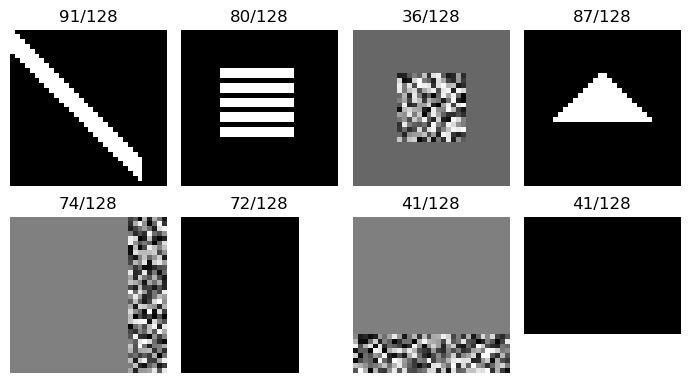

In [23]:
plot_images_with_titles(noises, scores)

In [ ]:
# index = 40
# s = sample_images[8+index:29+index]
# # print_images(s)
# for i in range(20):
#     # apply_noise_signle(s[1+i:2+i], lambda x: lines_herizontal_noise(x, number_of_lines=5, noise_value=1))
#     apply_noise_signle(s[1+i:2+i], lambda x: square_noise(x))
#     # apply_noise_signle(s[1+i:2+i], cross_noise)
#     # apply_noise_signle(s[1+i:2+i], tringle_noise)
#     # apply_noise_signle(s[1+i:2+i], lambda x: right_side_noise(x))
#     # apply_noise_signle(s[1+i:2+i], lambda x: right_side_noise(x, 1))
#     # apply_noise_signle(s[1+i:2+i], lambda x: bottom_noise(x))
#     # apply_noise_signle(s[1+i:2+i], lambda x: bottom_noise(x, 1))
# # s = right_side_noise(s, noise_value=1)
# # s = right_side_noise(s)
# # print_images(s)

In [ ]:
apply_noise(s, lambda x: lines_herizontal_noise(x, number_of_lines=5, noise_value=1))

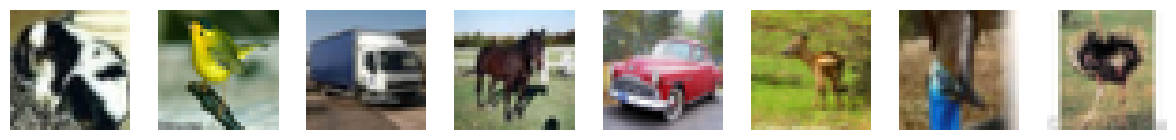

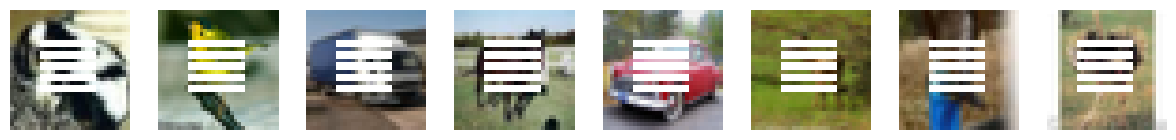

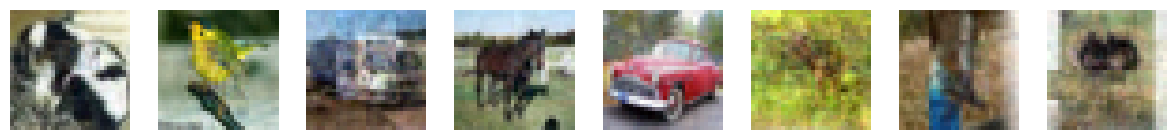

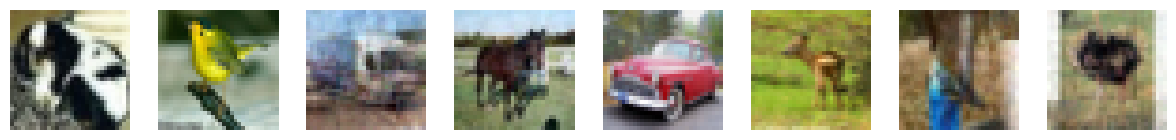

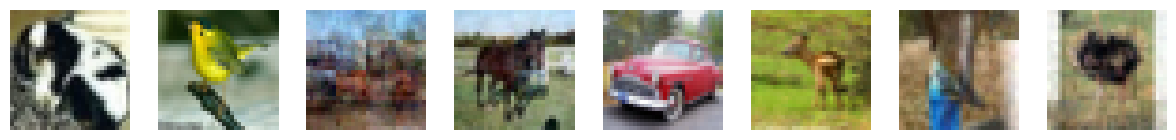

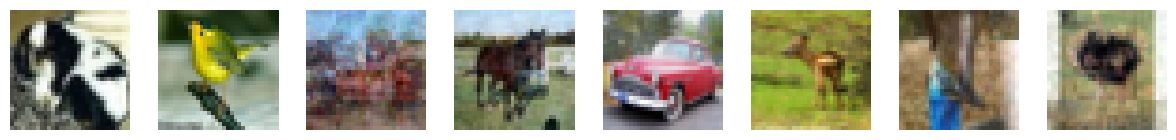

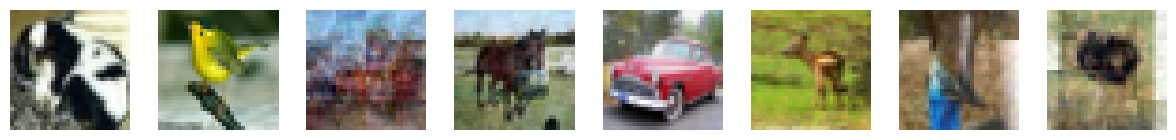

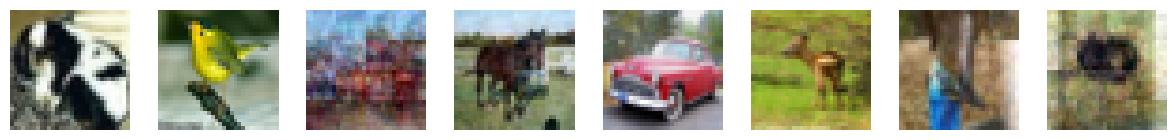

---------------------


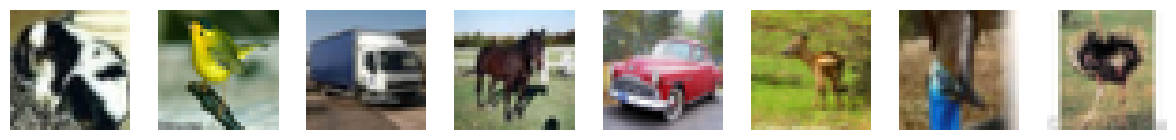

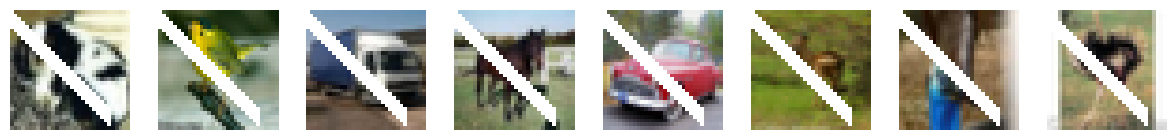

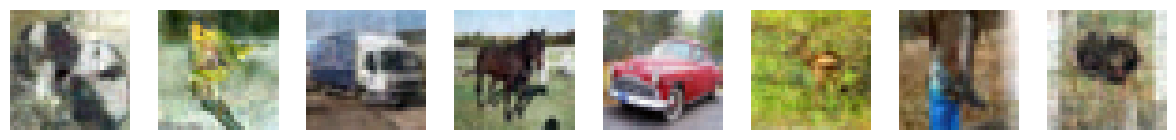

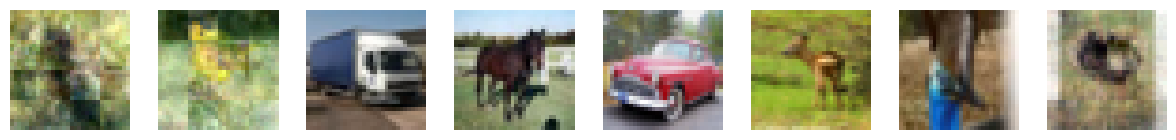

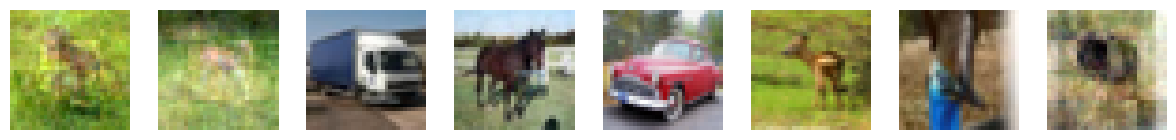

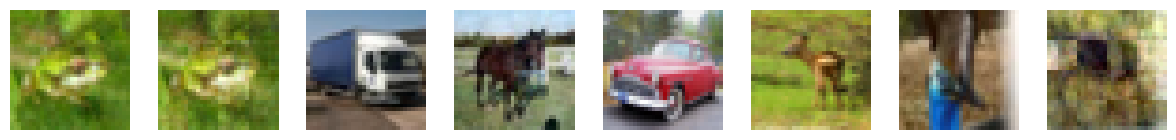

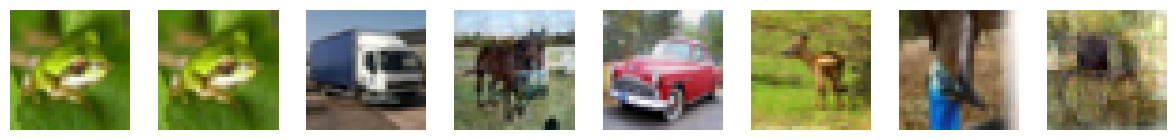

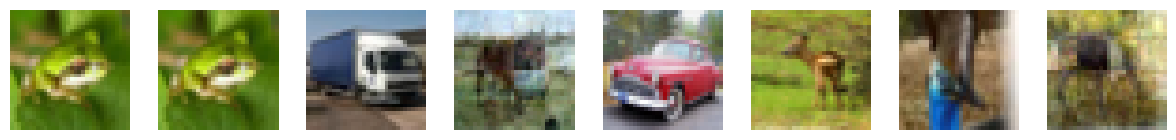

---------------------


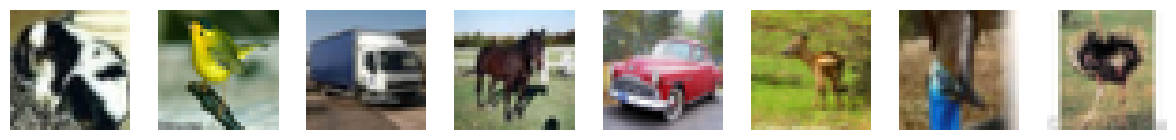

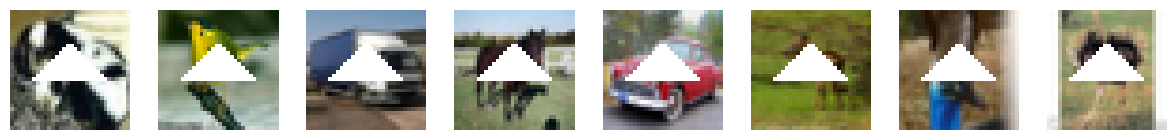

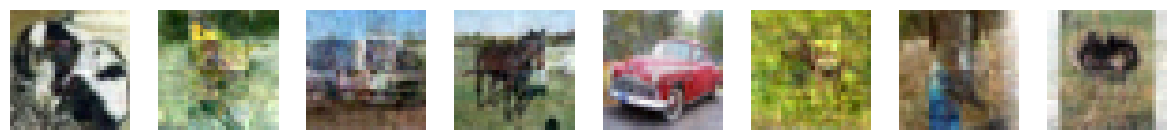

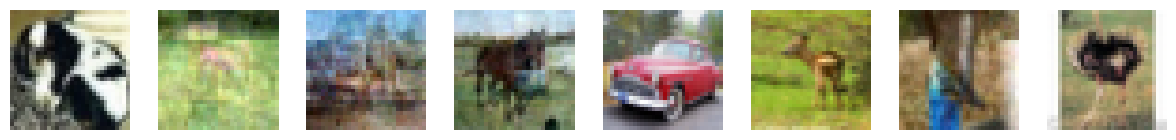

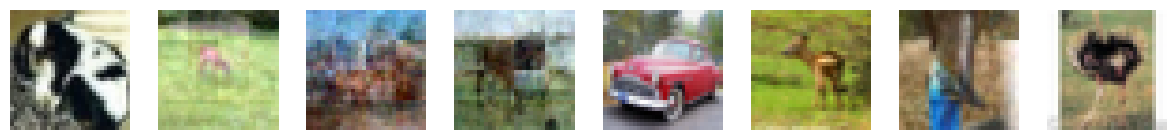

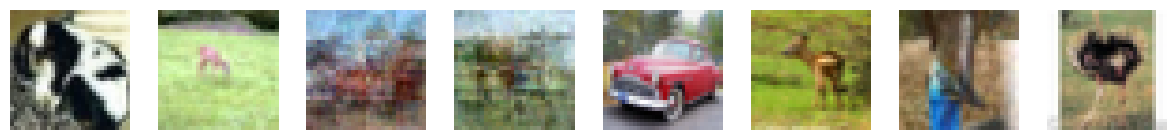

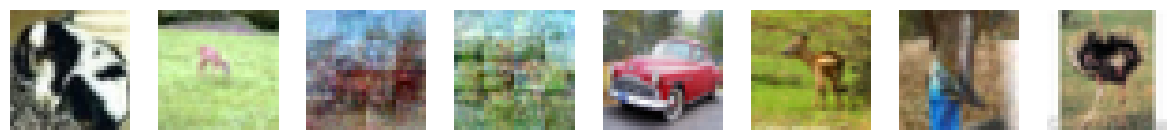

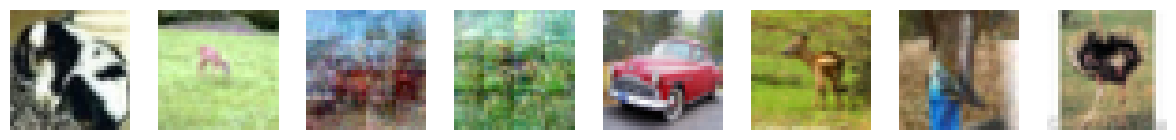

---------------------
---------------------


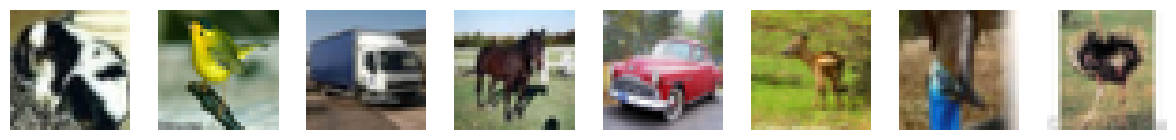

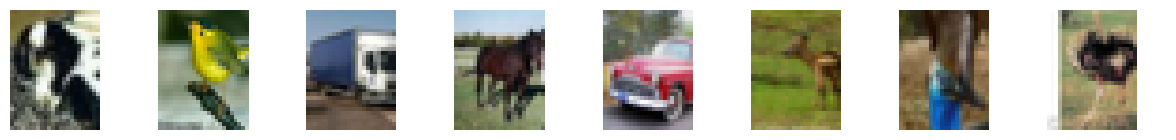

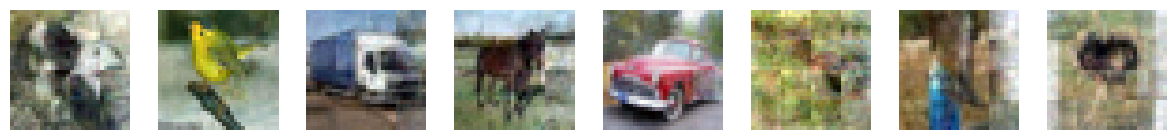

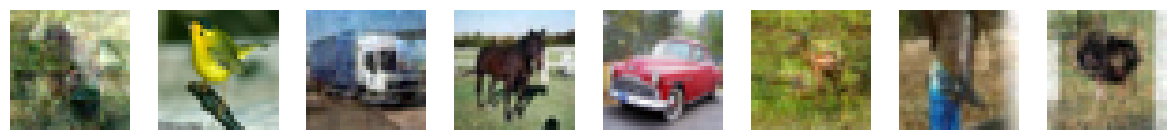

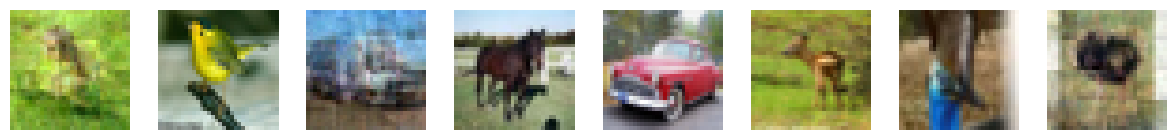

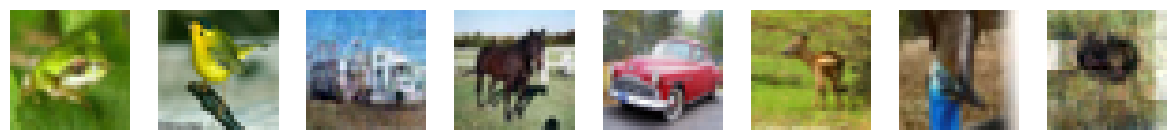

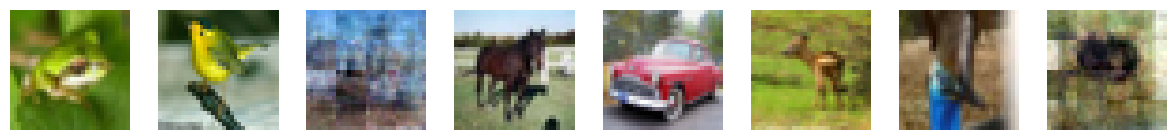

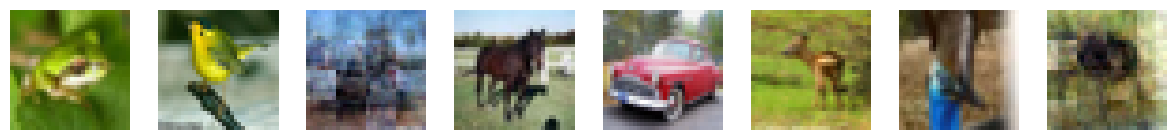

---------------------
---------------------


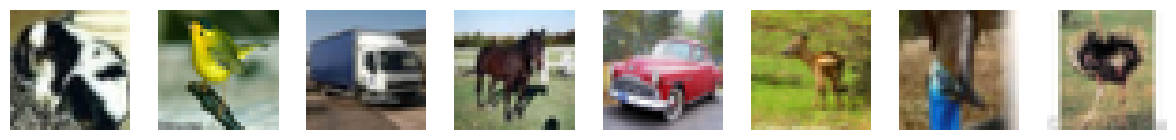

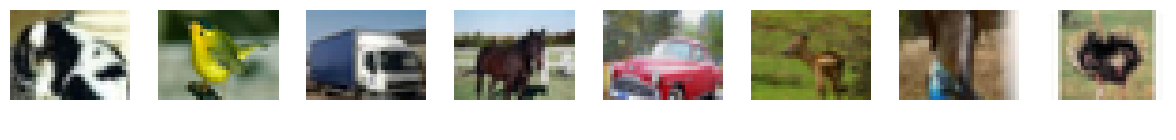

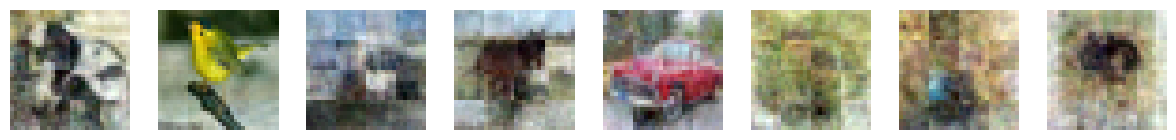

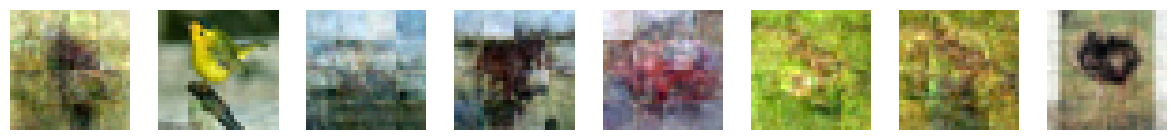

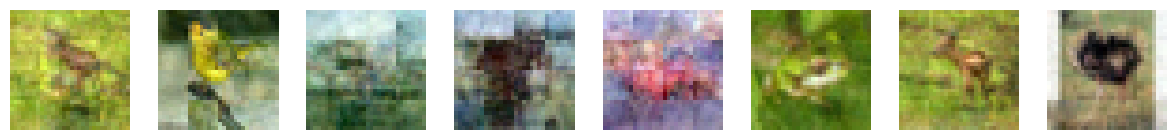

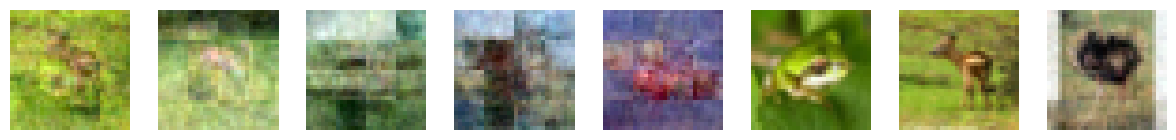

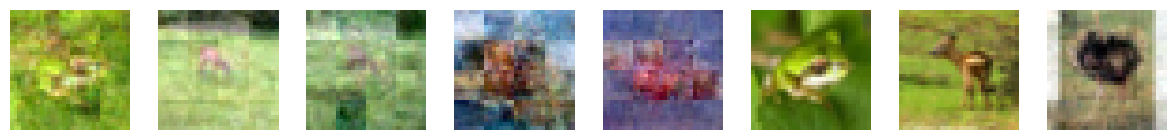

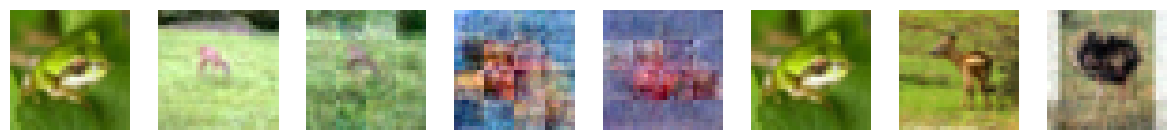

In [111]:
apply_noise(s, lambda x: lines_herizontal_noise(x, number_of_lines=5, noise_value=1))
print('---------------------')
apply_noise(s, cross_noise)
print('---------------------')
apply_noise(s, tringle_noise)
print('---------------------')
# apply_noise(s, lambda x: right_side_noise(x))
print('---------------------')
apply_noise(s, lambda x: right_side_noise(x, 1))
print('---------------------')
# apply_noise(s, lambda x: bottom_noise(x))
print('---------------------')
apply_noise(s, lambda x: bottom_noise(x, 1))

In [105]:
# apply_noise(s, lambda x: right_side_noise(x, 1))


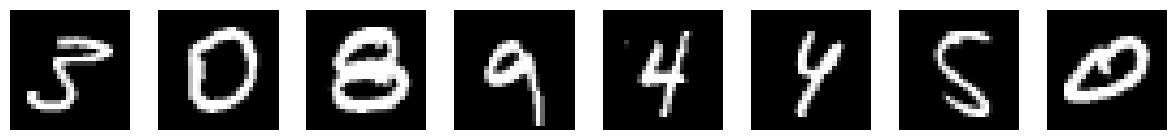

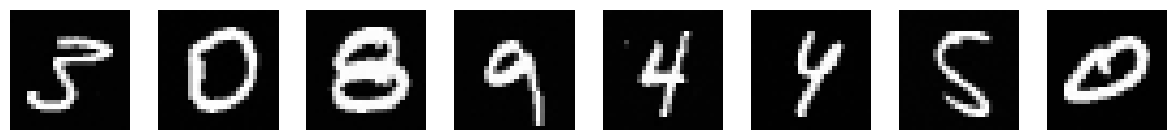

In [23]:
for images, _ in train_loader:
    # Move the images to the GPU
    images = images.to(device)
    # Add Gaussian noise
    # noises = torch.normal(mean, std_dev, size=images.shape).to(device)
    # noisy_images = images + noises
    # outputs = vit_model(images)
    # samples = vit_model((torch.maximum(test_samples[:16,:,:], noise)).to(device)).cpu()

    with torch.no_grad():
        noise = torch.ones((1, 28, 28)) * -1
        noise[:, 10:15, 10:15] = 1
        print_images(images[:8,:,:].cpu())
        outputs = vit_model(images[:8,:,:].to(device)).cpu()
        for i in range(500):
            outputs = vit_model(outputs[:8,:,:].to(device)).cpu()
    print_images(outputs[:8,:,:].cpu())
    
    # loss = criterion(outputs, images)

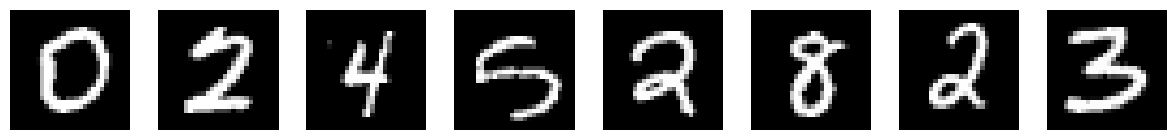

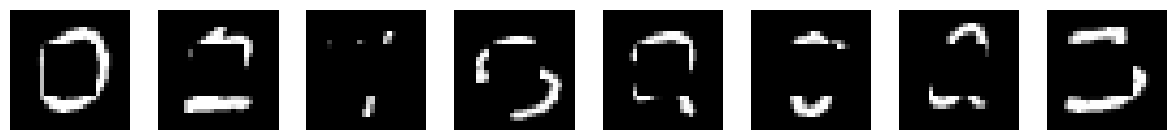

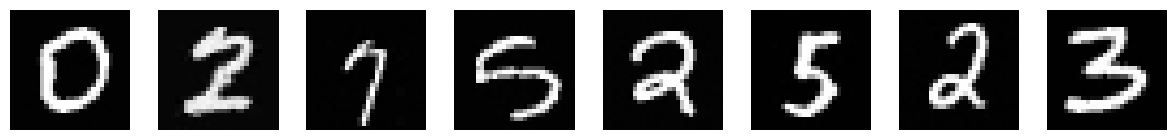

In [24]:
for images, _ in train_loader:
    # Move the images to the GPU
    images = images.to(device)
    # Add Gaussian noise
    # noises = torch.normal(mean, std_dev, size=images.shape).to(device)
    # noisy_images = images + noises
    # outputs = vit_model(images)
    samples = vit_model((torch.maximum(test_samples[:16,:,:], noise)).to(device)).cpu()

    with torch.no_grad():
        noise = torch.ones((1, 1, 28, 28)) * 1
        print_images(images[:8,:,:].cpu())
        noise[:, :, 8:20, 8:20] = -1
        print_images(torch.minimum(images[:8].cpu(), noise))
        outputs = vit_model(torch.minimum(images[:8], noise.to(device))).cpu()
        for i in range(10):
            outputs = vit_model(outputs[:8].to(device)).cpu()
    print_images(outputs[:8].cpu())
    
    # loss = criterion(outputs, images)

* 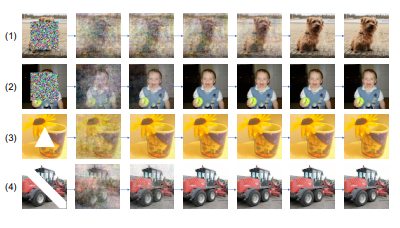

In [55]:
test_samples[:16,:,:].max()

tensor(1.)

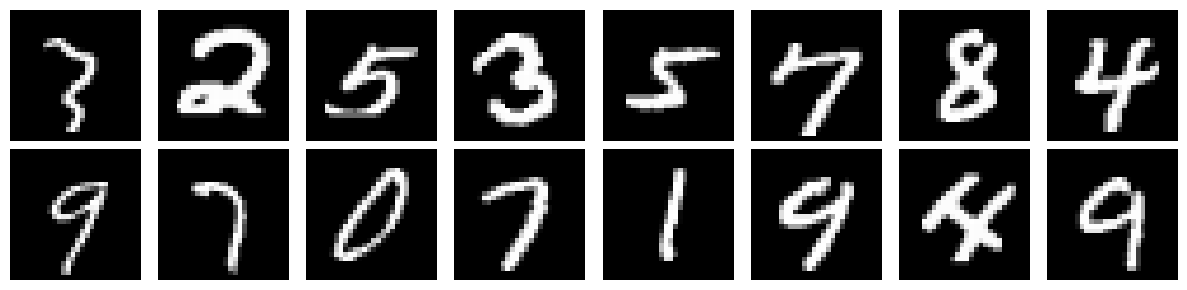

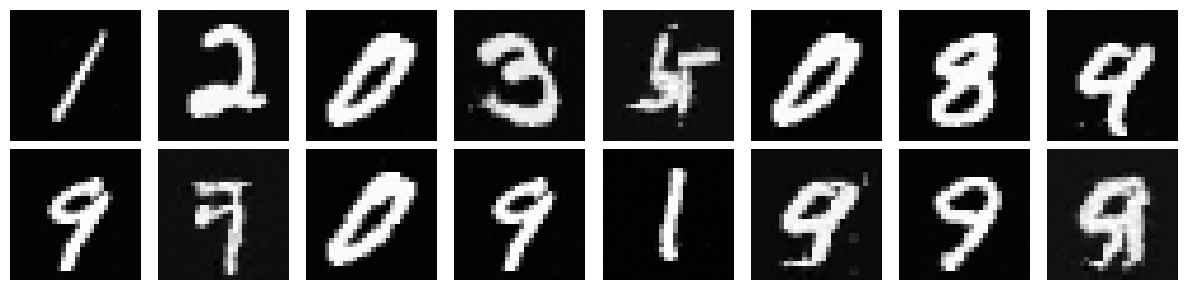

In [56]:
print_images(test_samples[:16,:,:])
with torch.no_grad():
    noise = torch.zeros((1, 28, 28))
    noise[:, 10:15, 10:15] = 1
    samples = vit_model(test_samples[:16,:,:].to(device)).cpu()
    for i in range(500):
        samples = vit_model(samples.to(device)).cpu()
    print_images(samples)

In [ ]:
print_images(test_samples[:,:,:])
with torch.no_grad():
    samples = vit_model(test_samples[:,:,:].to(device)).cpu()
    for i in range(100):
        samples = vit_model(samples.to(device)).cpu()
    print_images(samples)

In [ ]:
sample = sample_images[-1:,:,:]
print_images(sample)
for i in range(400):
    with torch.no_grad():
        sample = vit_model(sample.to(device)).cpu()
    print_images(sample)

In [ ]:
vit_model(sample_images[0:,:,:].to(device)).cpu()